In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from PIL import Image
from tensorflow.keras.models import Sequential
from keras.layers.normalization import batch_normalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

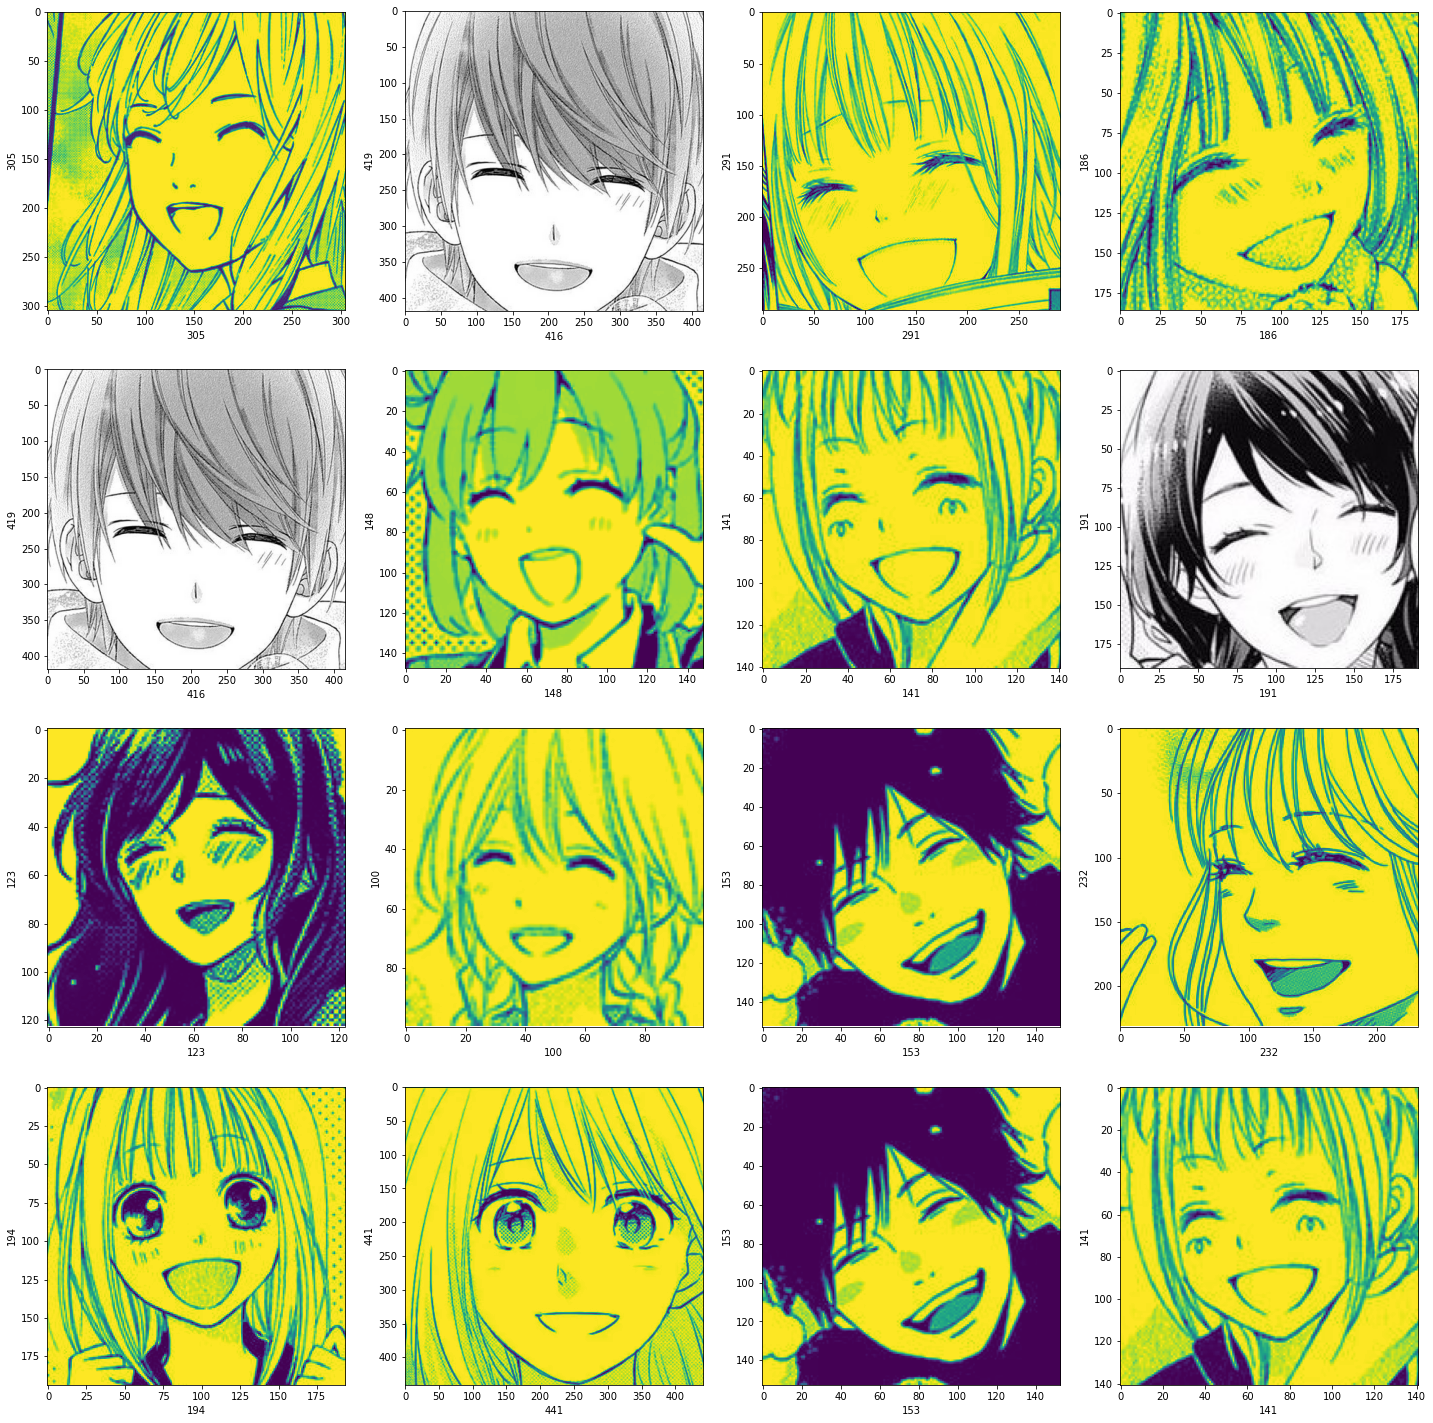

In [7]:
#plot 12 images
path = 'archive'
dir = os.listdir(path)
path_ = path+'/'+dir[0]

plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    img = imread(path_+'/'+random.choice(sorted(os.listdir(path_))))
    plt.imshow(img)
    plt.xlabel(img.shape[1])
    plt.ylabel(img.shape[0])

In [8]:
w,h = [],[]
for directory in dir:
    for file in os.listdir(f"{path}/{directory}"):
        img_path = path+'/'+directory+'/'+file
        img = imread(img_path)
        w.append(img.shape[1])
        h.append(img.shape[0])

np.mean(w),np.mean(h)      

(217.03956043956043, 217.02857142857144)

In [9]:
image_list, label_list = [],[]

for directory in dir:
    for file in os.listdir(f"{path}/{directory}"):
        img_path = path+'/'+directory+'/'+file
        img = Image.open(img_path)
        img = img.resize((217,217))
        img = image.img_to_array(img)
        image_list.append(img)
        label_list.append(directory)
        

In [10]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

shock          102
happy           86
embarrassed     66
sad             56
crying          55
angry           53
pleased         37
dtype: int64

In [11]:
label_list = np.array(label_list)
num_classes = len(label_counts)

In [18]:
image_list

[array([[[182.],
         [235.],
         [236.],
         ...,
         [241.],
         [188.],
         [121.]],
 
        [[229.],
         [240.],
         [175.],
         ...,
         [227.],
         [165.],
         [ 99.]],
 
        [[255.],
         [214.],
         [118.],
         ...,
         [205.],
         [150.],
         [ 92.]],
 
        ...,
 
        [[255.],
         [243.],
         [204.],
         ...,
         [  1.],
         [  1.],
         [  1.]],
 
        [[255.],
         [255.],
         [255.],
         ...,
         [  1.],
         [  1.],
         [  1.]],
 
        [[255.],
         [255.],
         [255.],
         ...,
         [  1.],
         [  1.],
         [  1.]]], dtype=float32),
 array([[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [247.],
         [241.]],
 
        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [248.],
         [244.]],
 
        [[255.],
 

In [77]:
x_train, x_test, y_train, y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=2)

In [46]:
test = cv2.resize(x_train[0],(217,217))

In [47]:
test.shape,x_train[0].shape

((217, 217), (217, 217, 1))

In [78]:
gray_x_train = []
for img in x_train:
    img_gray = img
    if img.shape[2] == 3:
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        img_gray = cv2.resize(img,(217,217))
    gray_x_train.append(img_gray)

In [49]:
x_train[0].shape,gray_x_train[0].shape

((217, 217, 1), (217, 217))

In [79]:
gray_x_test = []
for img in x_test:
    img_gray = img
    if img.shape[2] == 3:
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        img_gray = cv2.resize(img,(217,217))
    gray_x_test.append(img_gray)

In [80]:
x_train_ = np.array(gray_x_train, dtype=np.float32) / 225
x_test_ = np.array(gray_x_test, dtype=np.float32) / 225
x_train_ = x_train_.reshape(-1, 217, 217, 1)
x_test_ = x_test_.reshape(-1, 217, 217, 1)

In [75]:
x_train_

array([[[[0.04888889],
         [0.04      ],
         [0.03111111],
         ...,
         [0.01333333],
         [0.12444445],
         [0.20444444]],

        [[0.04      ],
         [0.03111111],
         [0.02666667],
         ...,
         [0.02222222],
         [0.09777778],
         [0.14666666]],

        [[0.02666667],
         [0.02222222],
         [0.01777778],
         ...,
         [0.04      ],
         [0.04888889],
         [0.05333333]],

        ...,

        [[1.0755556 ],
         [0.7866667 ],
         [0.3422222 ],
         ...,
         [0.13333334],
         [0.26222223],
         [0.41333333]],

        [[0.9288889 ],
         [0.61777776],
         [0.15555556],
         ...,
         [0.05333333],
         [0.20444444],
         [0.3511111 ]],

        [[0.79555553],
         [0.50222224],
         [0.07111111],
         ...,
         [0.        ],
         [0.16      ],
         [0.30222222]]],


       [[[1.1111112 ],
         [1.0933334 ],
         [0.99

In [81]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['angry' 'crying' 'embarrassed' 'happy' 'pleased' 'sad' 'shock']


In [82]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape= (217,217,1)))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Conv2D(filters=32, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Conv2D(filters=64, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Conv2D(filters=128, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(32))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(16))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(num_classes, activation= 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 215, 215, 16)      160       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 215, 215, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 213, 213, 32)      4640      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 213, 213, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 40, 40, 64)        18496     
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 40, 40, 64)       

In [83]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [84]:
# Tranning the model
epochs = 20
batch_size = 32
history = model.fit(x_train_,y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test_, y_test))

Epoch 1/20
12/12 [==============================] - 27s 2s/step - loss: 1.9384 - accuracy: 0.1758 - val_loss: 1.8960 - val_accuracy: 0.2418
Epoch 2/20
12/12 [==============================] - 15s 1s/step - loss: 1.9464 - accuracy: 0.1566 - val_loss: 1.9147 - val_accuracy: 0.2308
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 1.9235 - accuracy: 0.1923 - val_loss: 1.8800 - val_accuracy: 0.2967
Epoch 4/20
12/12 [==============================] - 15s 1s/step - loss: 1.9059 - accuracy: 0.2335 - val_loss: 1.8847 - val_accuracy: 0.2088
Epoch 5/20
12/12 [==============================] - 18s 2s/step - loss: 1.8900 - accuracy: 0.2363 - val_loss: 1.8602 - val_accuracy: 0.2527
Epoch 6/20
12/12 [==============================] - 21s 2s/step - loss: 1.8465 - accuracy: 0.2445 - val_loss: 1.8223 - val_accuracy: 0.2967
Epoch 7/20
12/12 [==============================] - 18s 2s/step - loss: 1.8277 - accuracy: 0.2830 - val_loss: 1.8098 - val_accuracy: 0.3626
Epoch 8/20
12/12 [==

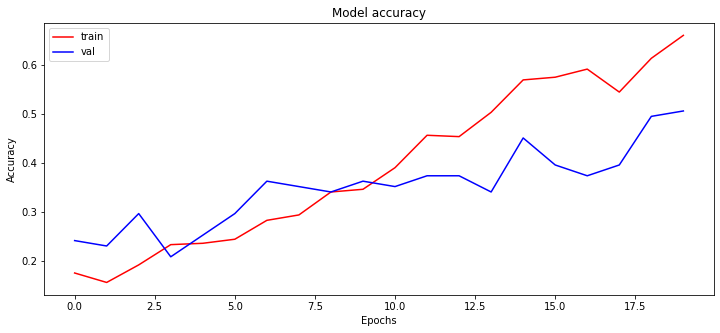

In [85]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()